# Data Preprocessing


## A. Data Collection

## Step 1: Loading the dataset

**Steps**: 1. Import the necessary libraries needed for data preprocessing step.
- Understanding the dataset is the initial implementation of the data preprocessing task.


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("customer_churn_dataset-testing-master.csv", low_memory="False")
df


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [4]:
# Print the first five and last five rows of the dataset
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [5]:
df.tail() #method for having last five elements in the dataset.

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1
64373,64374,52,Female,45,15,9,25,Standard,Monthly,696,22,1


In [6]:
# Looking at the information for datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


# B. Data Cleaning

# Step 2: Handling missing values
- Raw datasets often have missing values or null values.
-  If too many values are null and missing in a column, directly drop it.
- If few of the values are missing and null then fill the value with the respective value for mean, median and mode,etc.

In [7]:
# Check missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [8]:
## If the dataset was found with null or missing values. We would simply.

### Step 1.3: Remove Duplicates
- Duplicates entries can bias the model (e.g., one customer repeated multiple times).
- We remove them to keep the dataset clean.

In [9]:
# Remove duplicate rows
df = df.drop_duplicates()

In [10]:
print("Shape after removing duplicates:", df.shape) #Which practically means there were no duplicate data.

Shape after removing duplicates: (64374, 12)


# C. Data Transformation

### Step 1.4: Encode Categorical Variables
 Since, Machine learning models only work with numbers we implement numerical value encoding for categorical values.
 - There are two different encoding techniques:
 - One Hot Encoding: Example: 100, 010, 001
 - Drawback: Difficult to numerically categorize large sets of values.
- Label Encoding: Simply assigning numeric value to each of the column.

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:   # all categorical columns
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("Encoded categorical columns:\n", df.head())

Encoded categorical columns:
    CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22       0      25               14              4   
1           2   41       0      28               28              7   
2           3   47       1      27               10              2   
3           4   35       1       9               12              5   
4           5   53       0      58               24              9   

   Payment Delay  Subscription Type  Contract Length  Total Spend  \
0             27                  0                1          598   
1             13                  2                1          584   
2             29                  1                0          757   
3             17                  1                2          232   
4              2                  2                0          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                1

### Step 1.5: Feature Scaling
- Features may be in different ranges:
- Example: Age = [18, 60], Salary = [30,000, 120,000]
- Gradient-based models (like Logistic Regression, Neural Nets, SGD) converge faster when all features are scaled.

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop("Churn", axis=1))  # scale all except target
X = pd.DataFrame(scaled_features, columns=df.drop("Churn", axis=1).columns)
y = df["Churn"]

# D. Data Reduction/Splitting

### Step 1.6: Train-Test Split
- We split dataset into training set (used to train the model) and test set (used to evaluate performance).
- Training: usually 70–80%
- Testing: 20–30%
- This prevents overfitting (when a model memorizes instead of generalizing).

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (51499, 11)
Testing data shape: (12875, 11)


### Step 2: Data Visualization (Exploratory Data Analysis)

- After preprocessing, we want to understand patterns in the data. This is why we use visualization diagrams to depict the relationships between the datapoints in the dataset. For example:
- What features are correlated with Churn?
- Are there imbalances in the dataset (e.g., too many "No Churn" vs "Churn")?
- How do numerical variables (like tenure, charges) vary for churned vs. non-churned customers?
- Visualization helps us see relationships before building models

### Sub-Steps in Data Visualization
### 2.1  Correlation Heatmap
- A heatmap shows relationships between all numerical variables. Helps us see which features are important.
- For example: If MonthlyCharges is strongly correlated with Churn, it may be a key predictor.

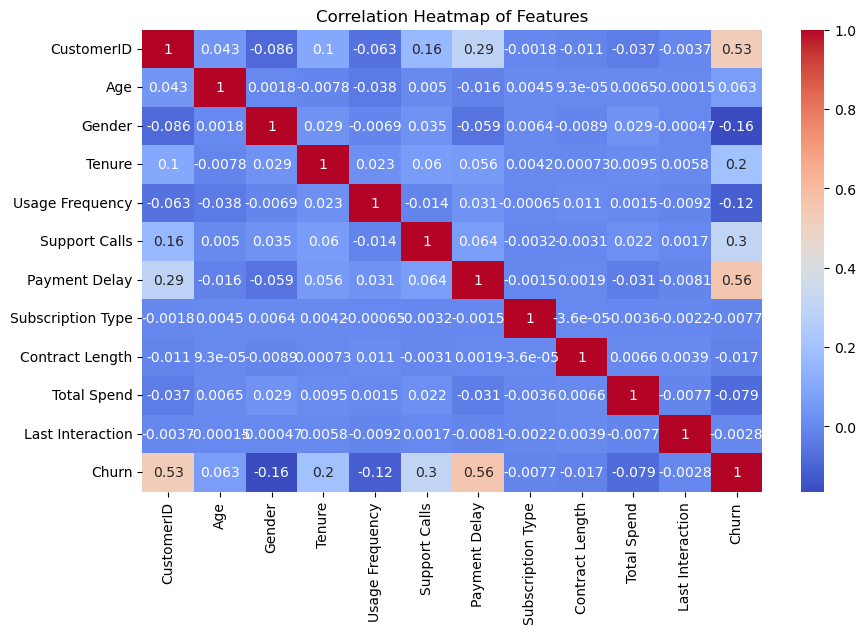

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

### 2.2 Class Distribution (Target Variable)
- If classes are imbalanced (e.g., 80% no churn, 20% churn), some models may struggle.
-  We check this first.

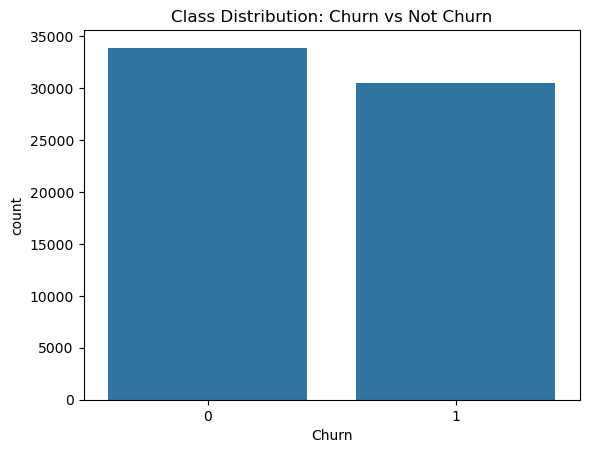

In [15]:
# Distribution of churn (target variable)
sns.countplot(x="Churn", data=df)
plt.title("Class Distribution: Churn vs Not Churn")
plt.show()

### 2.3 Boxplots (Numerical Features vs Churn)
- Helps us see how numeric features (e.g., MonthlyCharges, tenure) differ between churned and non-churned customers.

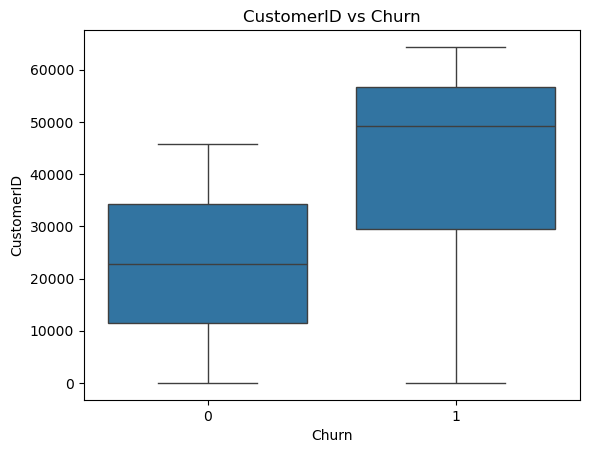

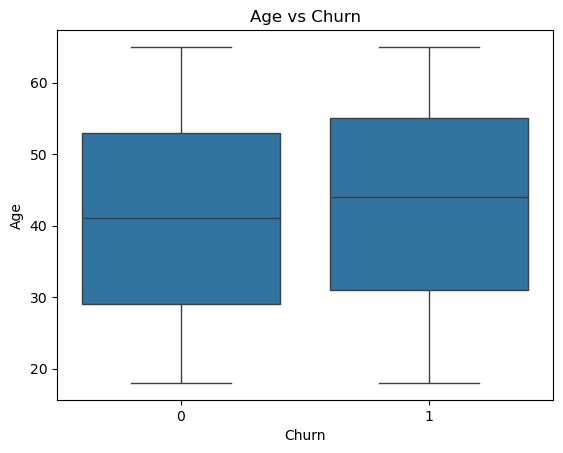

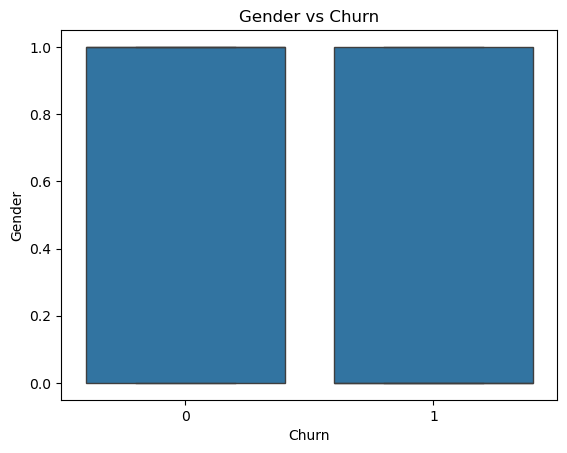

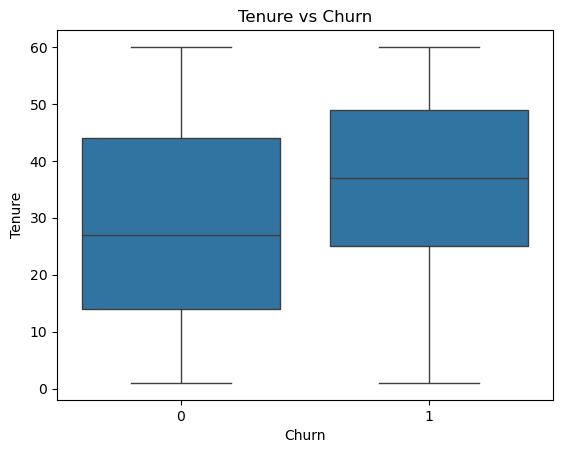

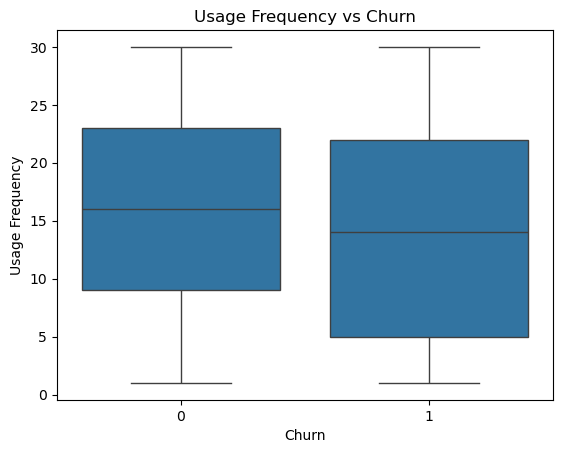

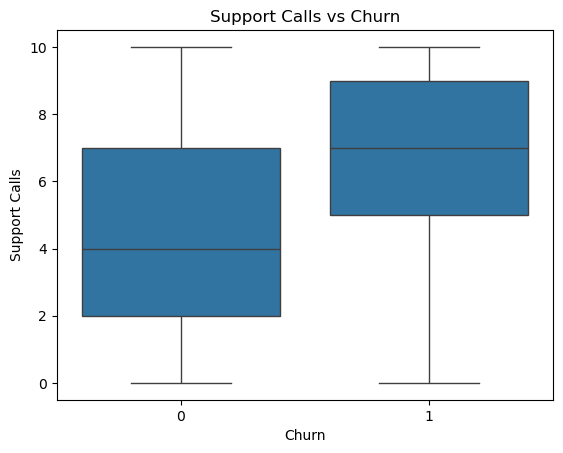

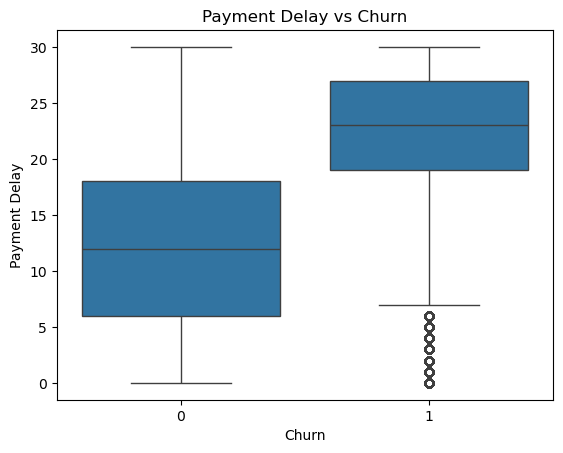

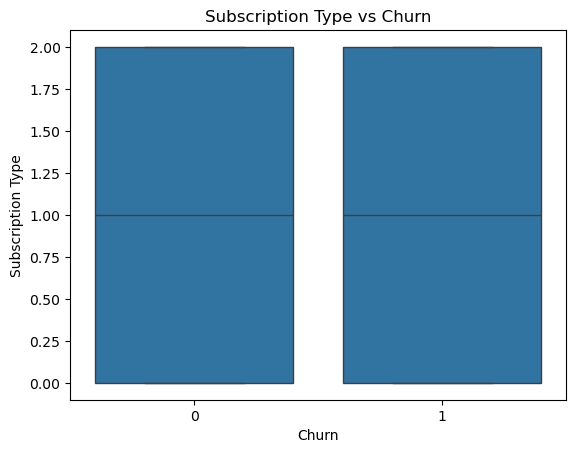

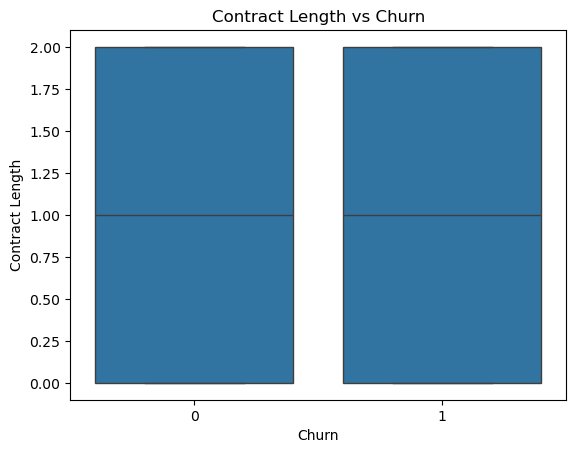

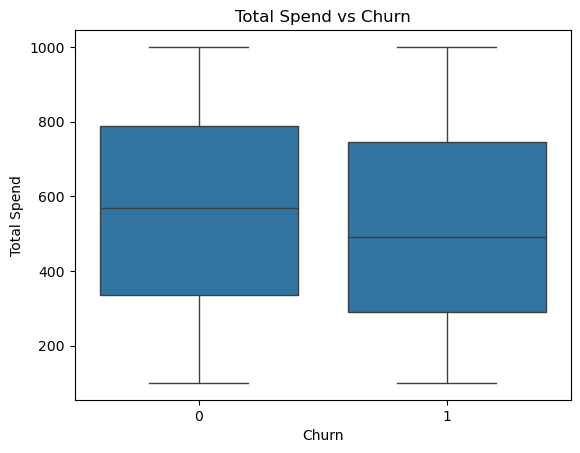

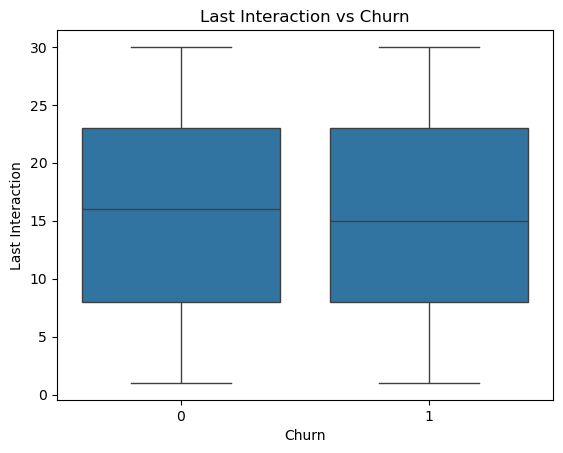

In [16]:
import numpy as np
# Boxplots for each numerical feature vs Churn
for col in df.select_dtypes(include=np.number).columns:
    if col != "Churn":
        sns.boxplot(x="Churn", y=col, data=df)
        plt.title(f"{col} vs Churn")
        plt.show()

### Step 3: Model Selection & Training
- After **preprocessing** and **visualization**, we need to choose and train machine learning models.
- Since our task is Customer Churn Prediction (binary classification: churn or not churn), the most common models are:
- **Logistic Regression** → classic baseline for classification
- **Linear Regression** → regression model (not ideal for churn but good for demonstration)

### 3.1 Logistic Regression (Classification)
- Logistic Regression is widely used for binary outcomes.
- It uses the sigmoid function to output probabilities between 0 and 1

In [39]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
log_regression_model = LogisticRegression(max_iter=1000)
log_regression_model.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

### 3.2 Linear Regression (for demonstration)
- Linear Regression predicts continuous values.
- Even though churn is categorical (0/1), we can still train linear regression and interpret the output:
- **Values closer to 1** → churn
- **Values closer to 0** → no churn

In [40]:
from sklearn.linear_model import LinearRegression

# Linear Regression
lin_regression_model= LinearRegression()
lin_regression_model.fit(X_train, y_train)
y_pred_lin = lin_regression_model.predict(X_test)  # continuous predictions

# Step 4: Logistic Regression with Gradient Descent (From Scratch)

In [43]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Simple Gradient Descent
def simple_gradient_descent(X, y, alpha=0.01, iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)   # initialize parameters

    for i in range(iterations):
        # Predictions
        h = sigmoid(np.dot(X, theta))
        
        # Gradient
        gradient = (1/m) * np.dot(X.T, (h - y))
        
        # Update
        theta -= alpha * gradient
    
    return theta

### Using the gradient descent in Churn data

In [44]:
# Prepare data (add intercept)
X_np = np.c_[np.ones((X_train.shape[0], 1)), X_train.values]
y_np = y_train.values

# Train with simple gradient descent
theta = simple_gradient_descent(X_np, y_np, alpha=0.01, iterations=1000)

# Predictions on test set
X_test_np = np.c_[np.ones((X_test.shape[0], 1)), X_test.values]
y_pred_probs = sigmoid(np.dot(X_test_np, theta))
y_pred_simple = (y_pred_probs >= 0.5).astype(int)

# Accuracy
accuracy_simple = np.mean(y_pred_simple == y_test.values)
print("Simple GD Logistic Regression Accuracy:", accuracy_simple)

Simple GD Logistic Regression Accuracy: 0.862757281553398


# Step 5: Linear Regression with Gradient Descent (From Scratch)

In [45]:
import numpy as np

# Simple Gradient Descent for Linear Regression
def simple_linear_gd(X, y, alpha=0.01, iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)   # initialize parameters

    for i in range(iterations):
        h = np.dot(X, theta)  # predictions
        gradient = (1/m) * np.dot(X.T, (h - y))  # compute gradient
        theta -= alpha * gradient  # update
    
    return theta

In [46]:
# Prepare data (add intercept term)
X_np = np.c_[np.ones((X_train.shape[0], 1)), X_train.values]
y_np = y_train.values

# Train with simple linear regression gradient descent
theta_lin = simple_linear_gd(X_np, y_np, alpha=0.01, iterations=1000)

# Predictions on test set
X_test_np = np.c_[np.ones((X_test.shape[0], 1)), X_test.values]
y_pred_lin = np.dot(X_test_np, theta_lin)

# Convert continuous predictions to binary (0/1 threshold at 0.5)
y_pred_lin_binary = (y_pred_lin >= 0.5).astype(int)

# Accuracy
accuracy_lin_gd = np.mean(y_pred_lin_binary == y_test.values)
print("Simple GD Linear Regression Accuracy:", accuracy_lin_gd)

Simple GD Linear Regression Accuracy: 0.863378640776699


# Step 5: Model Evaluation

- Once models are trained, we must measure how well they perform.
- **Evaluation** helps answer questions like:
1. Does the model predict churn correctly?
2. Which model is more accurate?
3. Does the model make more false positives or false negatives?
- Different metrics are used depending on the model type:
- 
- For Classification (Churn: Yes/No)
1. Accuracy → overall correctness
2. Precision → of predicted churns, how many were correct
3. Recall (Sensitivity) → of actual churns, how many we caught
4. F1 Score → balance of precision & recall
5. Confusion Matrix → breakdown of predictions

7. For Regression (Linear Regression demo)
8. MSE (Mean Squared Error)
9. R² Score (Coefficient of Determination)

In [51]:
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    mean_squared_error, r2_score
)

# --- Logistic Regression (Sklearn) ---
print("\n--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

# --- Linear Regression (Demo) ---
print("\n--- Linear Regression ---")
print("MSE:", mean_squared_error(y_test, y_pred_lin))
print("R² Score:", r2_score(y_test, y_pred_lin))

# --- Manual Gradient Descent Logistic Regression ---
print("\n--- Manual Gradient Descent Logistic Regression ---")
print("Accuracy:", accuracy_simple)
print(confusion_matrix(y_test, y_pred_simple))



--- Logistic Regression ---
Accuracy: 0.8653980582524272
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      6793
           1       0.86      0.86      0.86      6082

    accuracy                           0.87     12875
   macro avg       0.86      0.86      0.86     12875
weighted avg       0.87      0.87      0.87     12875

Confusion Matrix:
 [[5929  864]
 [ 869 5213]]

--- Linear Regression ---
MSE: 0.1102584698112215
R² Score: 0.5576170238934193

--- Manual Gradient Descent Logistic Regression ---
Accuracy: 0.862757281553398
[[5906  887]
 [ 880 5202]]


### Visualization of Confusion Matrix (Logistic Regression)

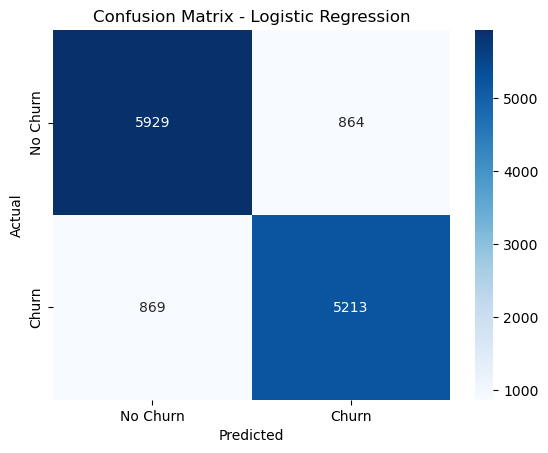

In [54]:
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Churn","Churn"],
            yticklabels=["No Churn","Churn"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### K-Folds Implementation

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identify categorical and numerical columns
numeric_features = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 
                    'Payment Delay', 'Total Spend', 'Last Interaction']
categorical_features = ['Gender', 'Subscription Type', 'Contract Length']

# Preprocessing: scale numeric, encode categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Build pipeline (preprocessing + model)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

# Define KFold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation
scores = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')

print("Fold Accuracies:", scores)
print("Mean Accuracy:", scores.mean())

Fold Accuracies: [0.83168932 0.82314563 0.82306796 0.82267961 0.83144322]
Mean Accuracy: 0.8264051486325265
